# ⚾⚾⚾ SALARY PREDICTION OF BASEBALL PLAYERS WITH LINEAR REGRESSION ⚾⚾⚾

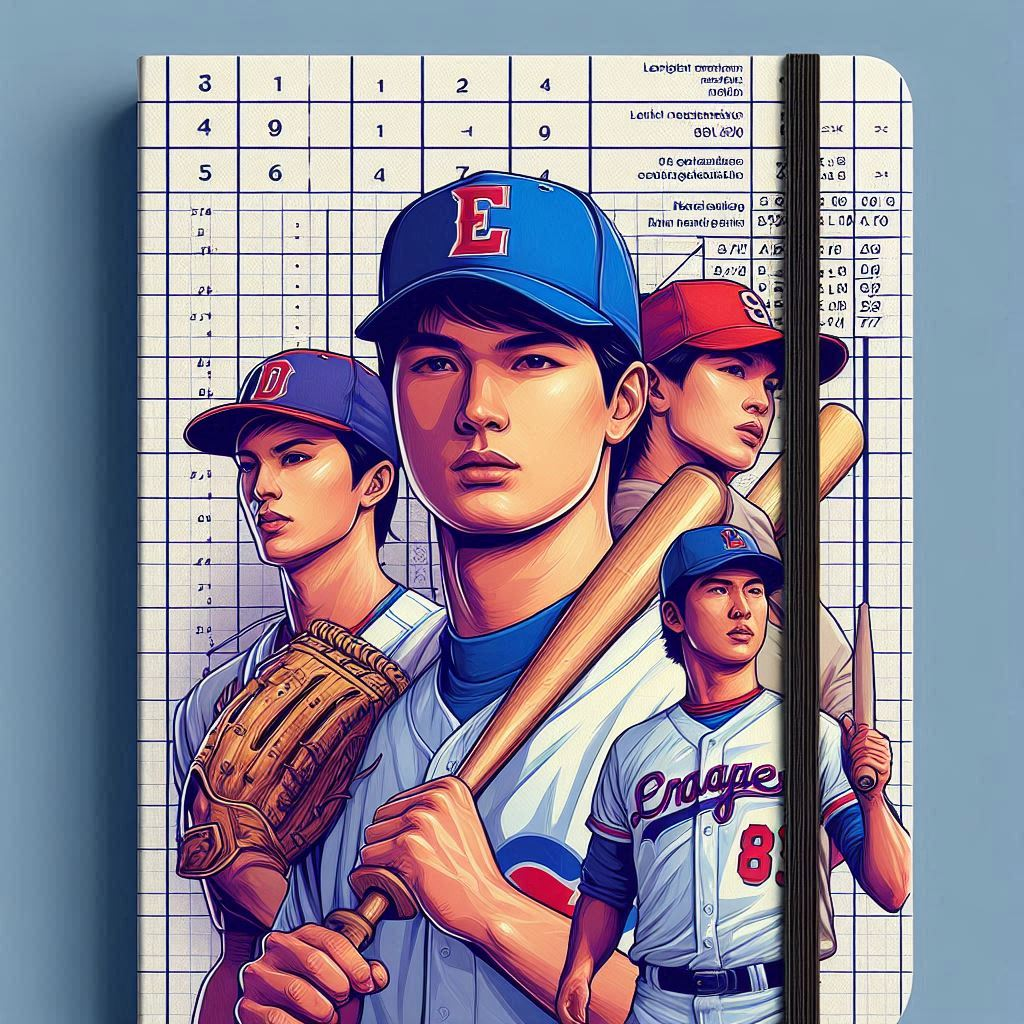

# İmport Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option("display.float_format", lambda x: "%.2f" %x)

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold

from warnings import filterwarnings
filterwarnings('ignore')

# Descriptions of Variables



AtBat: Number of times at bat in 1986

Hits: Number of hits in 1986

HmRun: Number of home runs in 1986

Runs: Number of runs in 1986

RBI: Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits: Number of hits during his career

CHmRun: Number of home runs during his career

CRuns: Number of runs during his career

CRBI: Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts: Number of put outs in 1986

Assists: Number of assists in 1986

Errors: Number of errors in 1986

Salary: 1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987


# Exploratory Data Analysis

In [8]:
df = pd.read_csv("hitters.csv")

In [9]:
df_copy = df.copy()

In [10]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N


In [11]:
df.shape

(322, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.00,380.93,153.40,16.00,255.25,379.50,512.00,687.00
Hits,322.00,101.02,46.45,1.00,64.00,96.00,137.00,238.00
HmRun,322.00,10.77,8.71,0.00,4.00,8.00,16.00,40.00
Runs,322.00,50.91,26.02,0.00,30.25,48.00,69.00,130.00
RBI,322.00,48.03,26.17,0.00,28.00,44.00,64.75,121.00
Walks,322.00,38.74,21.64,0.00,22.00,35.00,53.00,105.00
Years,322.00,7.44,4.93,1.00,4.00,6.00,11.00,24.00
CAtBat,322.00,2648.68,2324.21,19.00,816.75,1928.00,3924.25,14053.00
CHits,322.00,717.57,654.47,4.00,209.00,508.00,1059.25,4256.00
CHmRun,322.00,69.49,86.27,0.00,14.00,37.50,90.00,548.00


In [14]:
# Selection of Categorical and Numerical Variables:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in [int, float] and dataframe[col].nunique() == 2]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f'binary_cols: {len(binary_cols)}')

    return cat_cols, num_cols, cat_but_car,binary_cols

cat_cols, num_cols, cat_but_car,binary_cols = grab_col_names(df)


Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
binary_cols: 3


In [15]:
def cat_summary(dataframe, col_names):
    for col in col_names:
        print(pd.DataFrame({col: dataframe[col].value_counts(),
                            "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}))
        print("##########################################")
        
cat_summary(df, cat_cols)

        League  Ratio
League               
A          175  54.35
N          147  45.65
##########################################
          Division  Ratio
Division                 
W              165  51.24
E              157  48.76
##########################################
           NewLeague  Ratio
NewLeague                  
A                176  54.66
N                146  45.34
##########################################


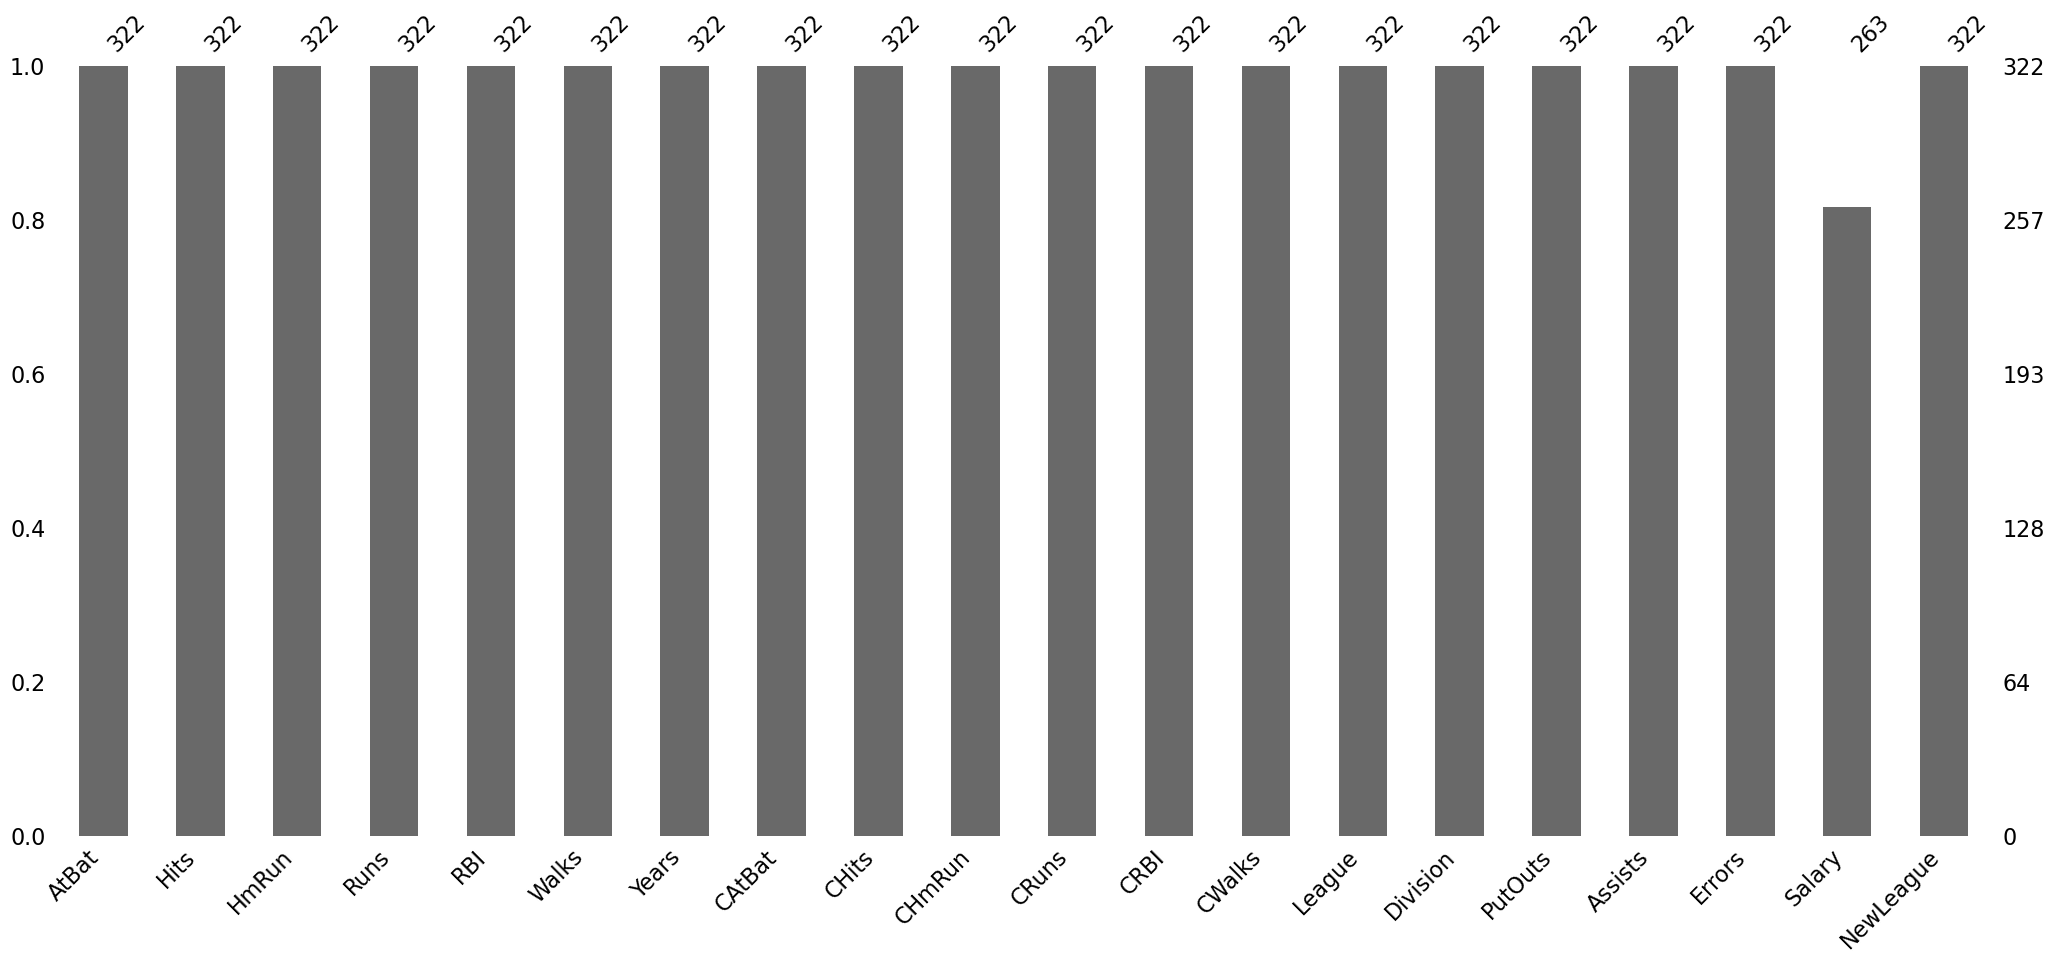

In [16]:
#Visualization for missing data was done using the missingno library.
msno.bar(df);

In [17]:
#Salary is the target/dependent variable we examined in this dataset.

print(df.Salary.min())
print(df.Salary.max())

67.5
2460.0


In [18]:
#The Salary variable in the dataset contains 59 null values
df["Salary"].isnull().sum()

59

In [19]:
df_null = df[df["Salary"].isnull()].head()
df_null

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


In [20]:
df[df['Salary'].isnull()]["NewLeague"].value_counts()

NewLeague
A    35
N    24
Name: count, dtype: int64

In [21]:
df[df['Salary'].isnull()]['League'].value_counts()

League
A    36
N    23
Name: count, dtype: int64

In [22]:
df[df['Salary'].isnull()]["Division"].value_counts()

Division
W    31
E    28
Name: count, dtype: int64

In [23]:
# Apply one-hot encoding to each column
df_one_hot = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'])

df_one_hot.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,True,False,True,False,True,False
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.00,False,True,False,True,False,True
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.00,True,False,False,True,True,False
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.00,False,True,True,False,False,True
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.50,False,True,True,False,False,True


In [24]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, check_outlier(df, col))

for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


## Missing Values

In [26]:
# Missing observations were filled using the KNN Algorithm

imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df_one_hot)

In [27]:
df = pd.DataFrame(df_filled,columns = df_one_hot.columns)
df.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_A       0
League_N       0
Division_E     0
Division_W     0
NewLeague_A    0
NewLeague_N    0
dtype: int64

# Visualization

count   322.00
mean    380.93
std     153.40
min      16.00
5%      161.00
10%     194.10
20%     221.80
30%     281.30
40%     321.80
50%     379.50
60%     430.20
70%     490.00
80%     535.60
90%     584.90
95%     609.90
99%     658.59
max     687.00
Name: AtBat, dtype: float64


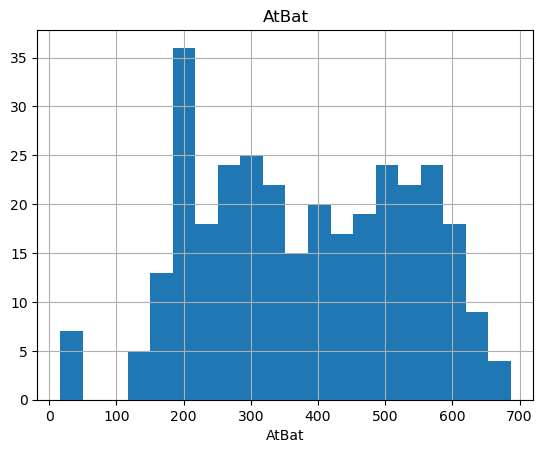

count   322.00
mean    101.02
std      46.45
min       1.00
5%       39.00
10%      45.10
20%      57.00
30%      70.00
40%      82.00
50%      96.00
60%     113.00
70%     128.70
80%     144.00
90%     163.00
95%     174.00
99%     210.79
max     238.00
Name: Hits, dtype: float64


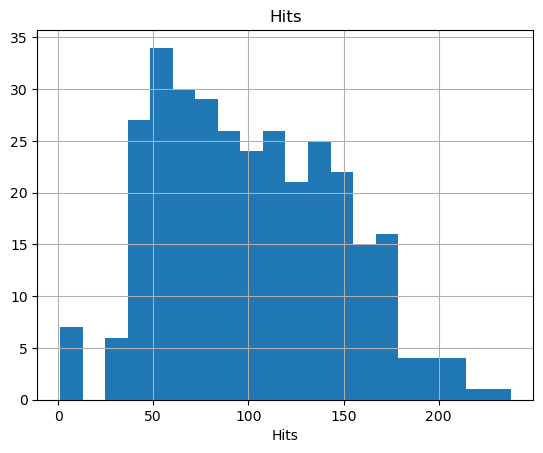

count   322.00
mean     10.77
std       8.71
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       5.00
40%       6.00
50%       8.00
60%      10.60
70%      14.00
80%      18.00
90%      24.00
95%      28.95
99%      33.00
max      40.00
Name: HmRun, dtype: float64


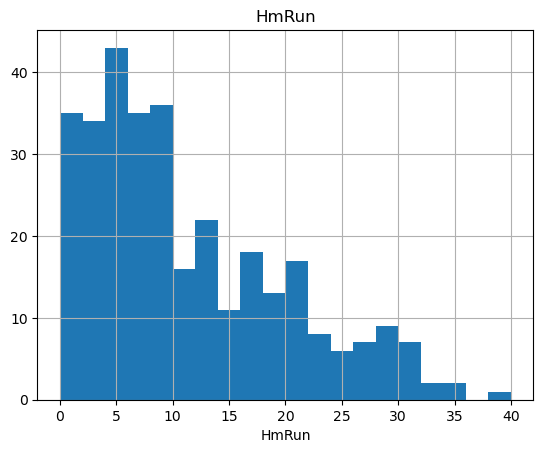

count   322.00
mean     50.91
std      26.02
min       0.00
5%       17.00
10%      20.10
20%      27.00
30%      33.00
40%      41.00
50%      48.00
60%      55.60
70%      66.00
80%      75.80
90%      89.00
95%      94.00
99%     107.79
max     130.00
Name: Runs, dtype: float64


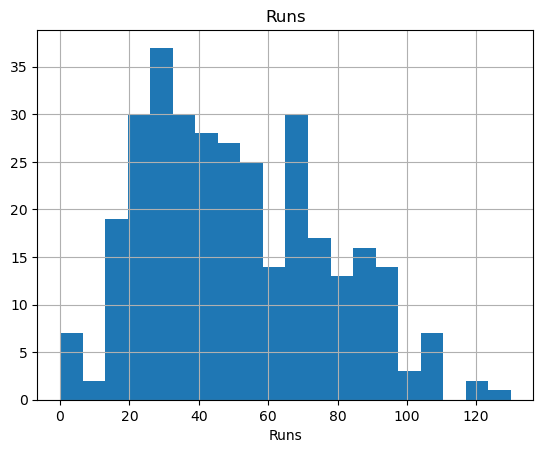

count   322.00
mean     48.03
std      26.17
min       0.00
5%       14.00
10%      19.00
20%      26.00
30%      30.00
40%      36.40
50%      44.00
60%      49.00
70%      58.00
80%      73.00
90%      86.00
95%      96.00
99%     112.37
max     121.00
Name: RBI, dtype: float64


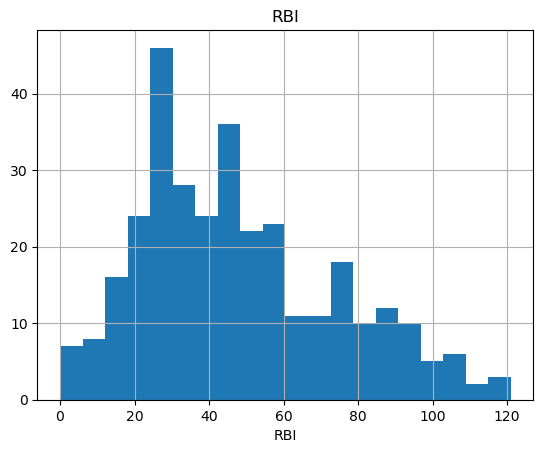

count   322.00
mean     38.74
std      21.64
min       0.00
5%       11.05
10%      15.00
20%      20.00
30%      24.00
40%      30.00
50%      35.00
60%      40.00
70%      48.70
80%      59.00
90%      69.90
95%      78.00
99%      93.58
max     105.00
Name: Walks, dtype: float64


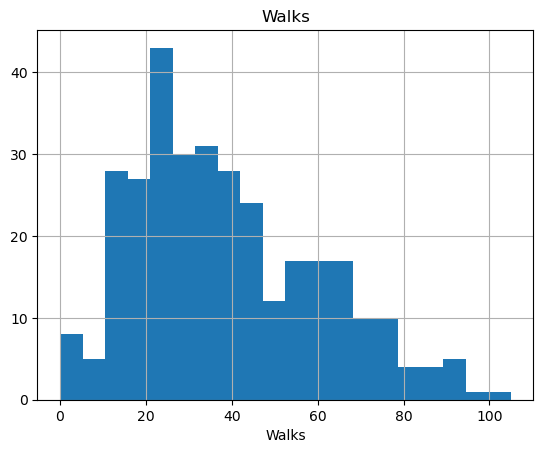

count   322.00
mean      7.44
std       4.93
min       1.00
5%        1.00
10%       2.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       7.60
70%      10.00
80%      12.00
90%      15.00
95%      17.00
99%      19.79
max      24.00
Name: Years, dtype: float64


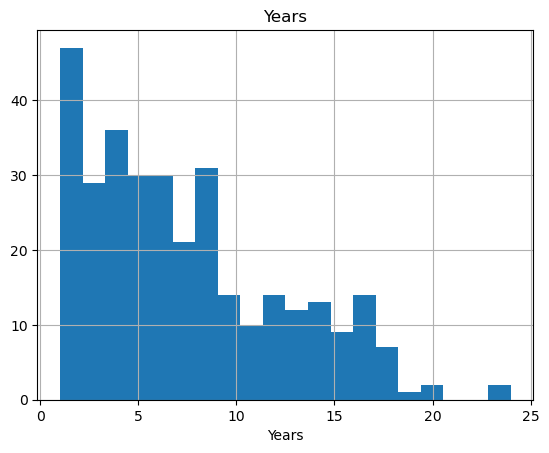

count     322.00
mean     2648.68
std      2324.21
min        19.00
5%        216.50
10%       342.20
20%       667.60
30%       963.40
40%      1402.20
50%      1928.00
60%      2654.00
70%      3365.00
80%      4483.00
90%      6123.40
95%      7125.60
99%      8749.97
max     14053.00
Name: CAtBat, dtype: float64


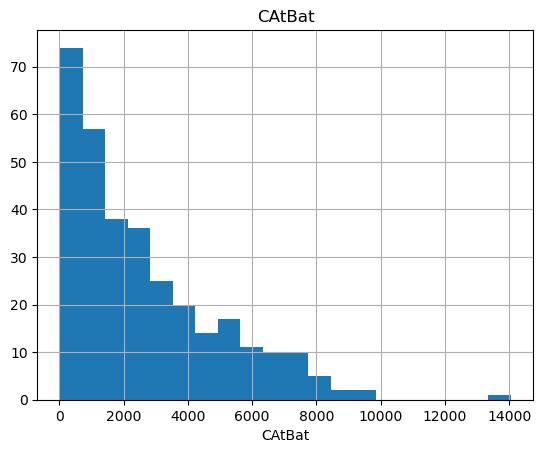

count    322.00
mean     717.57
std      654.47
min        4.00
5%        54.00
10%       86.00
20%      164.60
30%      238.00
40%      355.80
50%      508.00
60%      708.20
70%      911.10
80%     1229.20
90%     1659.60
95%     2017.15
99%     2500.34
max     4256.00
Name: CHits, dtype: float64


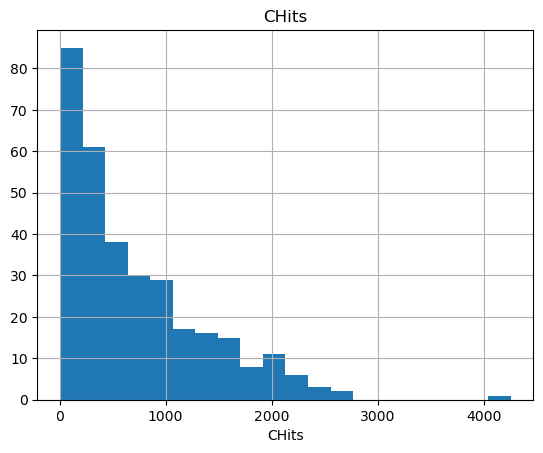

count   322.00
mean     69.49
std      86.27
min       0.00
5%        2.00
10%       4.00
20%      10.20
30%      16.30
40%      27.40
50%      37.50
60%      51.20
70%      72.40
80%     103.80
90%     194.90
95%     265.65
99%     373.12
max     548.00
Name: CHmRun, dtype: float64


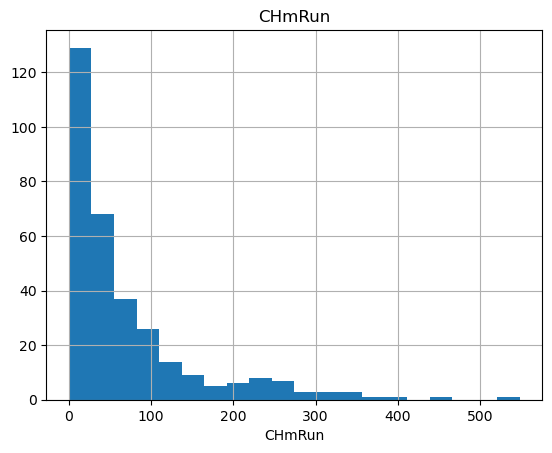

count    322.00
mean     358.80
std      334.11
min        1.00
5%        27.00
10%       38.10
20%       80.40
30%      117.30
40%      181.00
50%      247.00
60%      333.00
70%      443.40
80%      627.20
90%      895.70
95%     1032.30
99%     1174.37
max     2165.00
Name: CRuns, dtype: float64


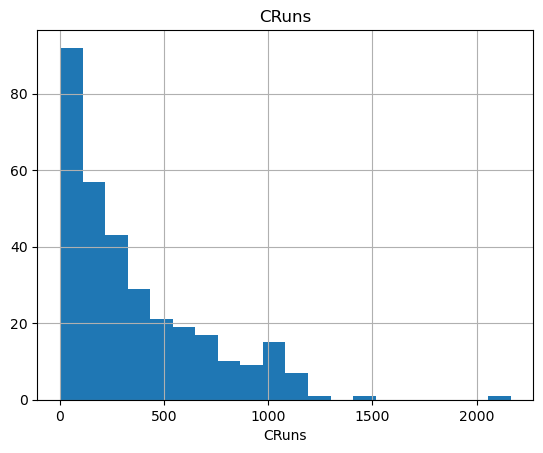

count    322.00
mean     330.12
std      333.22
min        0.00
5%        22.05
10%       34.10
20%       70.20
30%      106.30
40%      149.00
50%      220.50
60%      303.60
70%      379.10
80%      496.20
90%      861.60
95%     1071.75
99%     1310.85
max     1659.00
Name: CRBI, dtype: float64


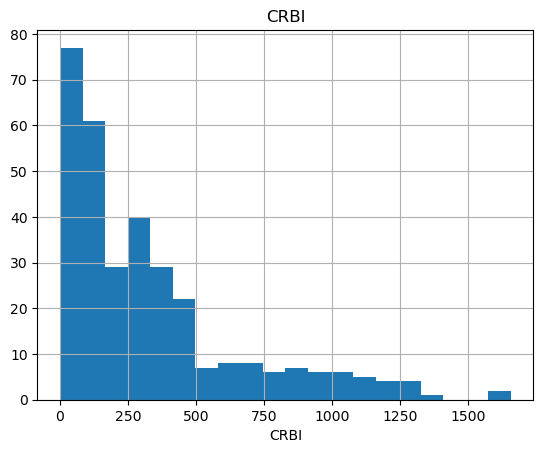

count    322.00
mean     260.24
std      267.06
min        0.00
5%        15.05
10%       30.10
20%       55.00
30%       82.00
40%      117.40
50%      170.50
60%      226.60
70%      300.70
80%      421.00
90%      643.90
95%      817.60
99%     1139.14
max     1566.00
Name: CWalks, dtype: float64


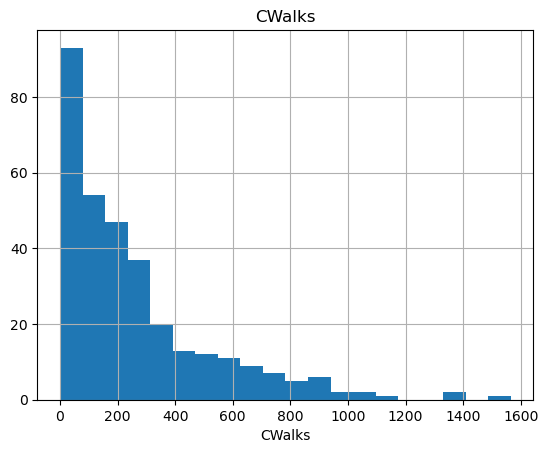

count    322.00
mean     288.94
std      280.70
min        0.00
5%        33.20
10%       62.20
20%       99.60
30%      132.00
40%      167.00
50%      212.00
60%      257.40
70%      303.00
80%      365.80
90%      685.60
95%      910.65
99%     1301.19
max     1378.00
Name: PutOuts, dtype: float64


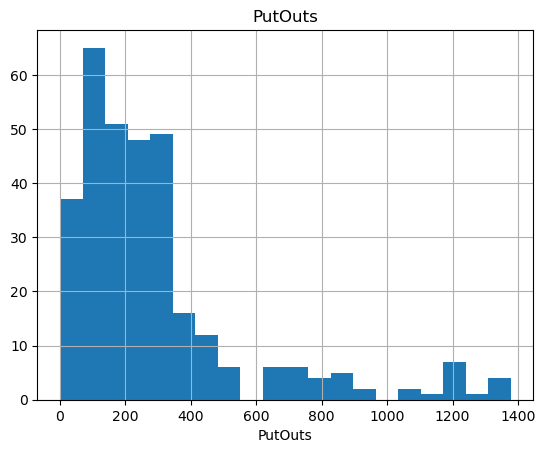

count   322.00
mean    106.91
std     136.85
min       0.00
5%        0.00
10%       2.00
20%       5.20
30%       9.00
40%      15.40
50%      39.50
60%      76.80
70%     134.80
80%     210.80
90%     353.30
95%     431.45
99%     478.16
max     492.00
Name: Assists, dtype: float64


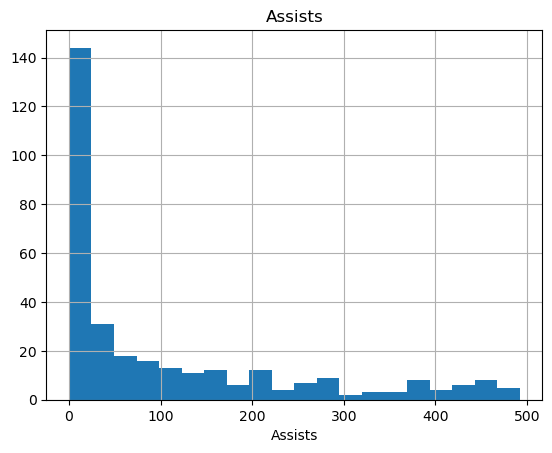

count   322.00
mean      8.04
std       6.37
min       0.00
5%        0.00
10%       1.00
20%       3.00
30%       4.00
40%       5.00
50%       6.00
60%       8.00
70%      10.00
80%      13.00
90%      17.00
95%      20.00
99%      25.79
max      32.00
Name: Errors, dtype: float64


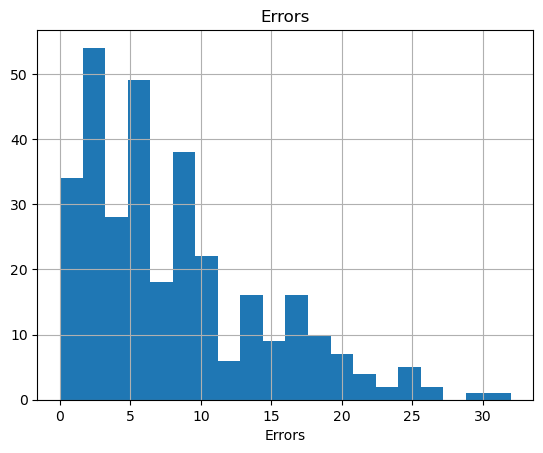

count    322.00
mean     524.75
std      431.10
min       67.50
5%        83.08
10%      100.00
20%      160.00
30%      230.46
40%      300.00
50%      427.50
60%      529.80
70%      676.75
80%      786.00
90%     1009.83
95%     1309.50
99%     1967.65
max     2460.00
Name: Salary, dtype: float64


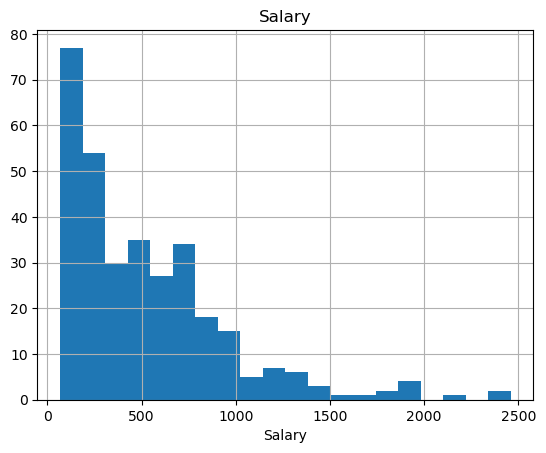

In [29]:
# General Exploration for Numerical Variables:

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)     

<Axes: >

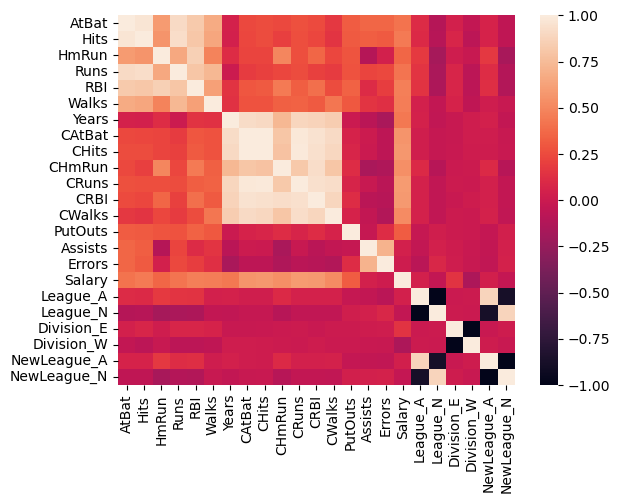

In [30]:
sns.heatmap(df.corr())

In [31]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the CSS property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Create a DataFrame containing only numerical data
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and visualize the correlation on the numerical DataFrame
numeric_df.corr().style.applymap(color_correlation)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.408613,0.101663,-0.101663,0.045441,-0.045441,0.057655,-0.057655
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.444213,0.101038,-0.101038,0.071143,-0.071143,0.060608,-0.060608
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.355121,0.177258,-0.177258,0.017206,-0.017206,0.166044,-0.166044
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.421595,0.150392,-0.150392,0.076311,-0.076311,0.115446,-0.115446
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.462120,0.145597,-0.145597,0.075531,-0.075531,0.120124,-0.120124
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.456738,0.045337,-0.045337,0.059086,-0.059086,0.020029,-0.020029
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.436588,0.047261,-0.047261,-0.021126,0.021126,0.042919,-0.042919
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.554796,0.028738,-0.028738,-0.022965,0.022965,0.016502,-0.016502
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.575060,0.025790,-0.025790,-0.013584,0.013584,0.010047,-0.010047
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.534195,0.098383,-0.098383,-0.006783,0.006783,0.097461,-0.097461


In [32]:
# Variable Correlations with the Target

df.corrwith(df['Salary']).sort_values(ascending=False)[1:]

CRuns          0.59
CRBI           0.58
CHits          0.58
CAtBat         0.55
CHmRun         0.53
CWalks         0.52
RBI            0.46
Walks          0.46
Hits           0.44
Years          0.44
Runs           0.42
AtBat          0.41
HmRun          0.36
PutOuts        0.32
Division_E     0.14
Assists        0.04
League_A       0.04
NewLeague_A    0.03
Errors         0.01
NewLeague_N   -0.03
League_N      -0.04
Division_W    -0.14
dtype: float64

#  Modeling with Linear Regression Models

## Simple Linear Regression


Simple Linear Regression is a statistical method used to analyze the relationship between a dependent variable and an independent variable by fitting a linear equation to the observed data. The model assumes a linear relationship between the two variables, represented by the equation:

**𝑦 = 𝛽0 +𝛽1⋅𝑥 + 𝜖**

**where:**
**y** is the dependent variable,

**x** is the independent variable,

**𝛽0** is the y-intercept,

**𝛽1** is the slope, and

**ϵ** represents the error term.

**Usage:**

Predictive Modeling: Simple linear regression can be used to predict the value of the dependent variable based on the value of the independent variable.
Trend Analysis: It helps to identify trends and relationships between variables.
Data Understanding: Understanding the relationship between variables in a dataset can provide insights into various phenomena.
This method is commonly used in various fields such as economics, finance, marketing, and engineering to model and analyze relationships between variables.

In [35]:
X = df[["CRuns"]]
y = df[["Salary"]]

### Robust Scaler 

RobustScaler is a preprocessing technique used in machine learning to normalize features by removing the median and scaling them according to the interquartile range. It is useful for data with outliers, ensuring robust statistics.

In [38]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Simple Linear Regression

In [42]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
print(f"Slope: {model.coef_[0]}, Intercept: {model.intercept_}")

Slope: [318.58763177], Intercept: [435.59794565]


In [44]:
y_pred = model.predict(X_test)

In [45]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [46]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.3049422068399825
MAE 		: 243.96307587409936
MSE 		: 139538.20638272158
RMSE 		: 373.5481312799216


### CV with Simple Linear Regression

In [48]:
def eval_metric_CV(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2
    
def k_fold_evaluation(X, y, model, scaler, k=10):
    X_scaled = scaler.fit_transform(X)
    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    mae_list = []
    mse_list = []
    rmse_list = []
    r2_list = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae, mse, rmse, r2 = eval_metric_CV(y_test, y_pred)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)

    print("Overall performance:")
    print("--------------------")
    print(f"Average R2_score \t: {np.mean(r2_list)}")
    print(f"Average MAE \t\t: {np.mean(mae_list)}")
    print(f"Average MSE \t\t: {np.mean(mse_list)}")
    print(f"Average RMSE \t\t: {np.mean(rmse_list)}")


In [49]:
model = LinearRegression()
scaler = RobustScaler()
k_fold_evaluation(X, y, model, scaler, k=10)

Overall performance:
--------------------
Average R2_score 	: 0.32433650837628925
Average MAE 		: 241.6385333821022
Average MSE 		: 123582.46935286894
Average RMSE 		: 343.8686010871373


## Multiple Linear Regression

Multiple Linear Regression is a statistical model used to predict a dependent variable based on one or more independent variables. It is often used to explore complex relationships and interactions.

Types include:

Ridge Regression: Useful for reducing the risk of overfitting in multiple linear regression.
Lasso Regression: Applied to reduce the number of parameters.
Elastic Net: A combination of Lasso and Ridge methods, offering the advantages of both.

In [52]:
y = df["Salary"]
X = df.drop("Salary",axis=1)
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(257, 22) (65, 22) (257,) (65,)


In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
model.intercept_

324.2344364200188

In [57]:
model.coef_


array([-455.17775381,  438.6657369 ,   40.51338046,  -56.57205059,
        -45.99348028,  176.91271066,  -31.01587459, -552.93638895,
        434.19931162,   18.55241607,  313.48747666,  255.59719704,
       -200.31022053,   55.76927318,   55.94944795,  -29.66251536,
        -25.57226051,   25.57226051,   38.42934108,  -38.42934108,
         31.04845887,  -31.04845887])

In [58]:
y_pred = model.predict(X_test)

In [59]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.4462757165547886
MAE 		: 226.28872849966532
MSE 		: 111164.41553906049
RMSE 		: 333.41328038796007


### CV with Multiple Linear Regression

In [61]:
model = LinearRegression()
scaler = RobustScaler()
k_fold_evaluation(X, y, model, scaler, k=10)

Overall performance:
--------------------
Average R2_score 	: 0.42305961941567755
Average MAE 		: 221.38917248223783
Average MSE 		: 101446.06829845824
Average RMSE 		: 311.90873634964055


### Ridge Regression

In [63]:
ridge_model = Ridge(random_state = 42)
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [64]:
ridge_model.intercept_

339.7706200892576

In [65]:
ridge_model.coef_

array([-374.57588503,  339.87537663,    9.40083245,  -25.60689583,
        -12.4862402 ,  163.95861924,  -66.85655752, -189.513891  ,
        229.18283391,   30.36949865,  229.92597721,  209.03544369,
       -194.63676852,   55.6817785 ,   47.19676359,  -31.57201498,
        -22.6920792 ,   22.6920792 ,   40.97571798,  -40.97571798,
         29.72418132,  -29.72418132])

In [66]:
y_pred = ridge_model.predict(X_test)

In [67]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.45942656714187247
MAE 		: 223.0608627728841
MSE 		: 108524.28097559352
RMSE 		: 329.4302368872559


### CV With Ridge Regression

In [69]:
model = Ridge(random_state = 42)
scaler = RobustScaler()
k_fold_evaluation(X, y, model, scaler, k=10)

Overall performance:
--------------------
Average R2_score 	: 0.4386469502981539
Average MAE 		: 218.92794247722023
Average MSE 		: 99668.9190837513
Average RMSE 		: 308.7392357163204


### Lasso Regression

In [71]:
lasso_model = Lasso(random_state = 42)
lasso_model.fit(X_train, y_train)

Lasso(random_state=42)

In [72]:
print("Intercept:\n")
print(lasso_model.intercept_)
print("\n")
print("Coefficients:\n")
print(lasso_model.coef_)

Intercept:

340.0910939590435


Coefficients:

[-4.46816839e+02  3.89448409e+02  0.00000000e+00 -9.52447129e+00
 -0.00000000e+00  1.60270187e+02 -6.92030624e+01 -3.01978995e+01
  4.62306906e+01  1.78198373e+01  2.59748604e+02  2.29175371e+02
 -2.02503190e+02  5.66816118e+01  4.15847411e+01 -2.26236431e+01
 -5.96741274e+00  0.00000000e+00  7.94154905e+01 -1.66523564e-11
  1.96734070e+01 -1.78133870e-15]


In [73]:
y_pred = ridge_model.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 108524.28097559352


### CV With Lasso Regression

In [76]:
model = Lasso(random_state = 42)
scaler = RobustScaler()
k_fold_evaluation(X, y, model, scaler, k=10)

Overall performance:
--------------------
Average R2_score 	: 0.44065035854726
Average MAE 		: 217.83664858566345
Average MSE 		: 99414.82878624581
Average RMSE 		: 308.58263117838874


### Elastic Net Regression

elastic_net = ElasticNet(random_state=42)

In [79]:
elastic_model = ElasticNet(random_state = 42)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [80]:
print("Intercept:\n")
print(elastic_model.intercept_)
print("\n")
print("Coefficients:\n")
print(elastic_model.coef_)

Intercept:

397.7151051575353


Coefficients:

[ 11.67778044  35.88575559   1.15676483  23.38134427  26.28754737
  33.41920439   9.6365531   30.68881092  45.43406504  43.71777503
  40.9421748   55.74106123   8.55744213  45.79984387   8.2522924
  -5.66465441  -1.05518758   1.05518672  22.43622272 -22.43619622
   3.28118043  -3.28124002]


In [81]:
y_pred = elastic_model.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 105867.23259343722


### CV With Elastic Net

In [84]:
model = ElasticNet(random_state = 42)
scaler = RobustScaler()
k_fold_evaluation(X, y, model, scaler, k=10)

Overall performance:
--------------------
Average R2_score 	: 0.44798892070268703
Average MAE 		: 215.79826616285794
Average MSE 		: 102581.4771990367
Average RMSE 		: 311.2633945215802


### ALL CV SCORES

In [86]:
def eval_metric_CV(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

def k_fold_evaluation(models, X, y, k=10, scaler=None):
    if scaler is None:
        scaler = StandardScaler()
    
    X_scaled = scaler.fit_transform(X)
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    results = []
    
    for model_name, model in models.items():
        mae_list = []
        mse_list = []
        rmse_list = []
        r2_list = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled[train_index], X_scaled[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            mae, mse, rmse, r2 = eval_metric_CV(y_test, y_pred)
            
            mae_list.append(mae)
            mse_list.append(mse)
            rmse_list.append(rmse)
            r2_list.append(r2)

        results.append({
            "Model": model_name,
            "Average R2_score": np.mean(r2_list),
            "Average MAE": np.mean(mae_list),
            "Average MSE": np.mean(mse_list),
            "Average RMSE": np.mean(rmse_list)
        })

    results_df = pd.DataFrame(results)
    return results_df

# Assuming you have the data ready in DataFrame form as `df`
y = df["Salary"]
X = df.drop("Salary", axis=1)

# Using RobustScaler in this case
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Defining the models
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(random_state=42),
    "Lasso": Lasso(random_state=42),
    "Ridge": Ridge(random_state=42)
}

# Perform k-fold cross-validation
results_df = k_fold_evaluation(models, X, y, k=10, scaler=scaler)
print(results_df)

               Model  Average R2_score  Average MAE  Average MSE  Average RMSE
0  Linear Regression              0.42       221.39    101446.07        311.91
1        Elastic Net              0.45       215.80    102581.48        311.26
2              Lasso              0.44       217.84     99414.83        308.58
3              Ridge              0.44       218.93     99668.92        308.74
